## SyriaTel Customer Churn

### Project Overview
The objective of this project is to develop a classification model that predicts whether a customer will churn (leave the service) based on various customer attributes. This is a binary classification problem where the target variable is whether the customer churned or not.


### Business Problem
Churn prediction is crucial for businesses as retaining customers is often more cost-effective than acquiring new ones. By accurately predicting customer churn, the business can take proactive measures to retain customers, thereby reducing churn rates and improving profitability.

### 2. Data Collection
#### Dataset Selection

We are using a telecom customer dataset for this project. The dataset contains information such as the customer's state, account length, area code, and various usage metrics like the number of customer service calls, total day minutes, etc.


Number of features: 21 (after excluding 'phone number' and the target variable)

#### Data Import and Initial Inspection

Let's load the dataset and take a look at the first few rows to understand its structure.

In [2]:
import os
import pandas as pd

# Define the path to the CSV file
file_path = os.path.join('Data', 'bigml_59c28831336c6604c800002a.csv')

# Load the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the data to inspect it
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3. Data Exploration and Preprocessing
#### Exploratory Data Analysis (EDA)
Before preprocessing, let's explore the target variable to understand the distribution of churned vs. non-churned customers.

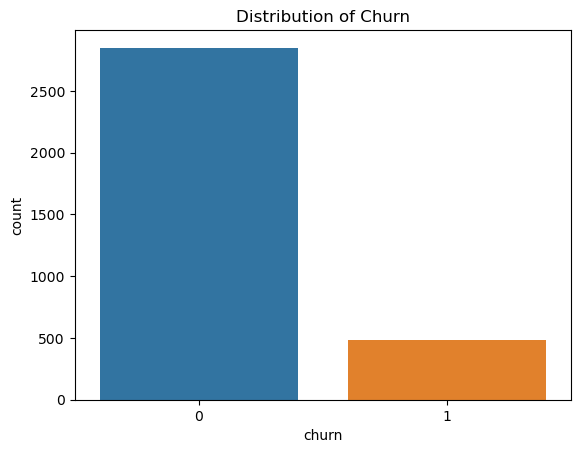

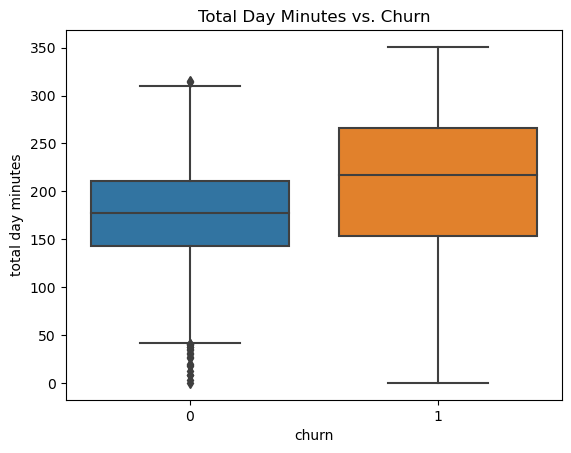

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Visualize relationships between key features and the target variable
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs. Churn')
plt.show()


### Data Cleaning and Preparation
Now, we'll prepare the data for modeling. This involves handling missing values, encoding categorical variables, and scaling numerical features.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'churn'
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])

# Define feature columns and target column
X = data.drop(columns=['phone number', 'churn'])  # Dropping 'phone number' as it is likely not useful
y = data['churn']

# Handle categorical variables: 'state', 'international plan', 'voice mail plan'
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X.columns.difference(categorical_features)


### 4. Baseline Model Development

#### Model Selection: 
We start with Logistic Regression, a simple and interpretable model that is a good starting point for binary classification problems. This model helps in understanding feature importance and is often effective in cases where the relationship between the features and the target is linear or approximately linear.

#### Model Training: 
We split the data into training and testing sets, train the logistic regression model, and evaluate its performance.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Handle categorical variables and numerical features
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X.columns.difference(categorical_features)

# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Pipeline and model training
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
baseline_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['account length', 'area code', 'customer service calls',
       'number vmail messages', 'total day calls', 'total day charge',
       'total day minutes', 'total eve calls', 'total eve charge',
       'total eve minutes', 'total intl calls', 'total intl charge',
       'total intl minutes', 'total night calls', 'total night charge',
       'total night minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

### Model Evaluation
Evaluate the baseline model's performance using classification metrics such as accuracy, precision, recall, and F1-score.

In [8]:
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline, target_names=['No Churn', 'Churn'])

print(f"Baseline Model Accuracy: {baseline_accuracy}")
print(f"Baseline Model Classification Report:\n{baseline_report}")


Baseline Model Accuracy: 0.875
Baseline Model Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.97      0.93       855
       Churn       0.66      0.29      0.40       145

    accuracy                           0.88      1000
   macro avg       0.77      0.63      0.67      1000
weighted avg       0.86      0.88      0.85      1000



### 5. Nonparametric Model Exploration
#### Decision Tree Model: 
Next, we explore a Decision Tree model, which is a nonparametric model. Decision Trees do not assume any specific structure for the underlying data, making them flexible and capable of capturing non-linear relationships. Decision Trees can also handle categorical features natively without needing encoding.

#### Model Training: 
We will train a Decision Tree model on the same dataset and evaluate its performance.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline and model training with Decision Tree
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
tree_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['account length', 'area code', 'customer service calls',
       'number vmail messages', 'total day calls', 'total day charge',
       'total day minutes', 'total eve calls', 'total eve charge',
       'total eve minutes', 'total intl calls', 'total intl charge',
       'total intl minutes', 'total night calls', 'total night charge',
       'total night minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### Model Evaluation: 
Evaluate the Decision Tree model using the same metrics.



In [11]:
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree, target_names=['No Churn', 'Churn'])

print(f"Decision Tree Model Accuracy: {tree_accuracy}")
print(f"Decision Tree Model Classification Report:\n{tree_report}")


Decision Tree Model Accuracy: 0.908
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.94      0.95       855
       Churn       0.68      0.70      0.69       145

    accuracy                           0.91      1000
   macro avg       0.81      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



### Comparison Between Logistic Regression and Decision Tree:

#### Interpretability: 
Logistic Regression is more interpretable as it provides clear coefficients for each feature, showing their direct impact on the target variable. Decision Trees, on the other hand, are less interpretable, especially as the depth of the tree increases.

#### Handling Non-Linearity: 
Decision Trees can capture non-linear relationships between features, which Logistic Regression may miss unless feature engineering or interaction terms are added.

#### Overfitting: 
Decision Trees are prone to overfitting, especially with deep trees, while Logistic Regression is less likely to overfit due to its linear nature. Regularization techniques can be applied to Logistic Regression to further control overfitting.

 Depending on the results, if the Decision Tree significantly outperforms Logistic Regression without overfitting (which can be assessed using techniques like cross-validation), it might be a better choice. However, if the tree is overfitting or not performing better, Logistic Regression might be preferable due to its simplicity and generalization ability.